In [14]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import pandas as pd
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt


logger = logging.getLogger(__name__)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys
sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")


This is the repository path:  c:\Users\Lenovo\Desktop\pypsa-earth
Had to go 0 folder(s) up.


# Load networks

In [15]:
def load_networks (nodes):
    solved_network = os.getcwd() + "/results/networks/elec_s_" + str(nodes) + "_ec_lcopt_Co2L-1H.nc"
    n_solve = pypsa.Network(solved_network)
    n = n_solve
    return n

In [16]:
load_networks(62).statistics()

INFO:pypsa.io:Imported network elec_s_62_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                9.934772e-01         3.522213e+08   
            Combined-Cycle Gas     9.997959e-01         1.486658e+07   
            Geothermal             9.988450e-01         2.768409e+08   
            Oil                             NaN         0.000000e+00   
            Onshore Wind           2.145819e-01         1.572288e+07   
            Open-Cycle Gas                  NaN         0.000000e+00   
            Run of River           6.423366e-01         1.560406e+08   
            Solar                  2.036741e-01         9.390585e+08   
            load                   5.079491e-08         0.000000e+00   
Line        AC                     3.409508e-01         1.497362e+08   
Link        H2 electrolysis        2.868482e-01         9.130817e+07   
            H2 fuel cell           1.096427e-01         9.579116e+07   
            battery charger        2.436005e-01         1.442552e+08   
            battery discharger     1.973164e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        6.575987e-01         1.076876e+09   
Store       Battery Storage        4.192528e-01         3.184839e+08   
            Hydrogen Storage       5.191144e-01         8.388228e+07   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Biomass                0.000000        9.900000e+01   
            Combined-Cycle Gas     0.000000        1.236000e+02   
            Geothermal             0.000000        5.500000e+01   
            Oil                    0.000000        0.000000e+00   
            Onshore Wind           2.639081        4.500000e+01   
            Open-Cycle Gas         0.000000        0.000000e+00   
            Run of River           2.385385        8.637700e+02   
            Solar                 97.004723        1.004000e+02   
            load                   0.000000        6.200000e+10   
Line        AC                          NaN        1.032268e+05   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        6.077320e+03   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        2.666136e+04      1.792981e+03   
            Combined-Cycle Gas             1.592757e+03      1.236000e+02   
            Geothermal                     9.236383e+00      9.349991e+02   
            Oil                            0.000000e+00      0.000000e+00   
            Onshore Wind                   6.556722e-01      1.214472e+02   
            Open-Cycle Gas                 0.000000e+00      0.000000e+00   
            Run of River                   5.558940e+00      8.637700e+02   
            Solar                          7.636875e+01      1.846506e+04   
            load                           3.179728e+03      6.200000e+10   
Line        AC                                      NaN      7.600314e+04   
Link        H2 electrolysis                0.000000e+00      1.871283e+03   
            H2 fuel cell                   0.000000e+00      3.916535e+03   
            battery charger                0.000000e+00      3.746136e+03   
            battery discharger             0.000000e+00      4.162373e+03   
Load        -     

In [17]:
node_list = [2,3,4,5,6,7,8,9,10,12,15,17,20,22,25,27,30,32,35,37,40,42,45,47,50,52,55,57,60,62]

# Generation expansion analysis

In [18]:
def compile_maximum_capacity (node_list):
    maximum_capacity = pd.DataFrame()
    for nodes in node_list:
        n = load_networks(nodes)
        maximum_capacity[nodes] = n.statistics()['Optimal Capacity']
    return maximum_capacity

In [19]:
def compile_generation_expansion (node_list):
    expanded_capacity = pd.DataFrame()
    for nodes in node_list:
        n = load_networks(nodes)
        expanded_capacity[nodes] = n.statistics()['Optimal Capacity'] - n.statistics()['Installed Capacity']
    return expanded_capacity


In [20]:
maximum_capacity = compile_maximum_capacity(node_list)
maximum_capacity

INFO:pypsa.io:Imported network elec_s_2_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_3_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_7_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_8_ec_lcopt_Co2L-1H.nc has 

2             3             4   \
            carrier                                                        
Generator   Biomass             1.792999e+03  1.793000e+03  1.793000e+03   
            Combined-Cycle Gas  1.236000e+02  1.236000e+02  1.236000e+02   
            Geothermal          9.349987e+02  9.349996e+02  9.349999e+02   
            Oil                 0.000000e+00  0.000000e+00  0.000000e+00   
            Onshore Wind        4.507186e+01  4.519583e+01  4.535987e+01   
            Open-Cycle Gas      0.000000e+00  0.000000e+00  0.000000e+00   
            Run of River        8.637700e+02  8.637700e+02  8.637700e+02   
            Solar               1.986146e+04  1.968234e+04  1.858911e+04   
            load                2.000000e+09  3.000000e+09  4.000000e+09   
Line        AC                  2.276725e+03  2.853212e+03  6.924379e+03   
Link        H2 electrolysis     1.668883e+03  1.649419e+03  1.680748e+03   
            H2 fuel cell        3.760816e+03  3.585727e+03  3.721554e+03   
            battery charger     3.370499e+03  3.494596e+03  3.478077e+03   
            battery discharger  3.744999e+03  3.882885e+03  3.864530e+03   
Load        -                            NaN           NaN           NaN   
StorageUnit Reservoir & Dam     6.077320e+03  6.077320e+03  6.077320e+03   
Store       Battery Storage     1.890292e+04  1.974891e+04  1.910940e+04   
            Hydrogen Storage    9.750332e+04  9.160039e+04  9.431137e+04   

                                          5             6             7   \
            carrier                                                        
Generator   Biomass             1.793000e+03  1.793000e+03  1.792998e+03   
            Combined-Cycle Gas  1.236000e+02  1.236000e+02  1.236000e+02   
            Geothermal          9.349999e+02  9.350000e+02  9.349999e+02   
            Oil                 0.000000e+00  0.000000e+00  0.000000e+00   
            Onshore Wind        4.523099e+01  4.590013e+01  4.774727e+01   
            Open-Cycle Gas      0.000000e+00  0.000000e+00  0.000000e+00   
            Run of River        8.637700e+02  8.637700e+02  8.637700e+02   
            Solar               1.829511e+04  1.794941e+04  1.763040e+04   
            load                5.000000e+09  6.000000e+09  7.000000e+09   
Line        AC                  7.516986e+03  1.138752e+04  1.311621e+04   
Link        H2 electrolysis     1.655750e+03  1.665840e+03  1.705410e+03   
            H2 fuel cell        3.694520e+03  3.691997e+03  3.741921e+03   
            battery charger     3.464774e+03  3.454180e+03  3.425421e+03   
            battery discharger  3.849749e+03  3.837978e+03  3.806023e+03   
Load        -                            NaN           NaN           NaN   
StorageUnit Reservoir & Dam     6.077320e+03  6.077320e+03  6.077320e+03   
Store       Battery Storage     1.912443e+04  1.905211e+04  1.874892e+04   
            Hydrogen Storage    9.380766e+04  9.415389e+04  9.347157e+04   

                                          8             9             10  \
            carrier                                                        
Generator   Biomass             1.793000e+03  1.793000e+03  1.793000e+03   
            Combined-Cycle Gas  1.236000e+02  1.236000e+02  1.236000e+02   
            Geothermal          9.349997e+02  9.349990e+02  9.350000e+02   
            Oil                 0.000000e+00  0.000000e+00  0.000000e+00   
            Onshore Wind        4.756065e+01  4.724030e+01  4.555541e+01   
            Open-Cycle Gas      0.000000e+00  0.000000e+00  0.000000e+00   
            Run of River        8.637700e+02  8.637700e+02  8.637700e+02   
            Solar               1.774693e+04  1.773488e+04  1.764509e+04   
            load                8.000000e+09  9.000000e+09  1.000000e+10   
Line        AC                  1.356263e+04  1.523507e+04  1.788074e+04   
Link        H2 electrolysis     1.816038e+03  1.749039e+03  1.731189e+03   
            

In [21]:
expanded_capacity = compile_generation_expansion(node_list)
expanded_capacity

INFO:pypsa.io:Imported network elec_s_2_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_3_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_7_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_8_ec_lcopt_Co2L-1H.nc has 

2             3             4   \
            carrier                                                        
Generator   Biomass              1693.998840   1694.000026   1694.000038   
            Combined-Cycle Gas      0.000000      0.000000      0.000000   
            Geothermal            879.998696    879.999598    879.999909   
            Oil                     0.000000      0.000000      0.000000   
            Onshore Wind            0.071864      0.195832      0.359870   
            Open-Cycle Gas          0.000000      0.000000      0.000000   
            Run of River            0.000000      0.000000      0.000000   
            Solar               19761.059883  19581.939676  18488.709124   
            load                    0.000000      0.000000      0.000000   
Line        AC                  -1655.722721  -1079.236177   -940.517128   
Link        H2 electrolysis      1668.883318   1649.419337   1680.747851   
            H2 fuel cell         3760.815614   3585.727057   3721.553965   
            battery charger      3370.499110   3494.596356   3478.076586   
            battery discharger   3744.999011   3882.884840   3864.529540   
Load        -                            NaN           NaN           NaN   
StorageUnit Reservoir & Dam         0.000000      0.000000      0.000000   
Store       Battery Storage     18902.917357  19748.914111  19109.404349   
            Hydrogen Storage    97503.324202  91600.390891  94311.372600   

                                          5             6             7   \
            carrier                                                        
Generator   Biomass              1694.000000   1693.999914   1693.997842   
            Combined-Cycle Gas      0.000000      0.000000      0.000000   
            Geothermal            879.999943    880.000004    879.999945   
            Oil                     0.000000      0.000000      0.000000   
            Onshore Wind            0.230986      0.900126      2.747266   
            Open-Cycle Gas          0.000000      0.000000      0.000000   
            Run of River            0.000000      0.000000      0.000000   
            Solar               18194.711331  17849.014424  17530.002472   
            load                    0.000000      0.000000      0.000000   
Line        AC                  -1331.021882   -409.824364   -647.353813   
Link        H2 electrolysis      1655.750070   1665.840189   1705.410454   
            H2 fuel cell         3694.520369   3691.996770   3741.920824   
            battery charger      3464.774412   3454.180173   3425.421123   
            battery discharger   3849.749347   3837.977970   3806.023470   
Load        -                            NaN           NaN           NaN   
StorageUnit Reservoir & Dam         0.000000      0.000000      0.000000   
Store       Battery Storage     19124.428045  19052.110070  18748.916600   
            Hydrogen Storage    93807.655186  94153.885426  93471.572856   

                                          8             9             10  \
            carrier                                                        
Generator   Biomass              1694.000032   1693.999567   1693.999993   
            Combined-Cycle Gas      0.000000      0.000000      0.000000   
            Geothermal            879.999745    879.998960    879.999997   
            Oil                     0.000000      0.000000      0.000000   
            Onshore Wind            2.560645      2.240299      0.555410   
            Open-Cycle Gas          0.000000      0.000000      0.000000   
            Run of River            0.000000      0.000000      0.000000   
            Solar               17646.533186  17634.480658  17544.690289   
            load                    0.000000      0.000000      0.000000   
Line        AC                  -2167.166030  -2460.948112   -798.385940   
Link        H2 electrolysis      1816.037561   1749.039353   1731.188662   
            

In [22]:
#removing non generation components
expanded_capacity_4plot = expanded_capacity.drop(index=['Line','Load','Store'], level=0)
expanded_capacity_4plot = expanded_capacity_4plot.drop(index=['Oil','Combined-Cycle Gas','Open-Cycle Gas','load','H2 electrolysis','battery charger'], level=1)

#adding expansion of hydro compared to 2020 (considered as nominal capacities due to being planned)
expanded_capacity_4plot.loc[('StorageUnit','Reservoir & Dam'), : ] = maximum_capacity.loc[('StorageUnit','Reservoir & Dam'), : ] - 369.67
expanded_capacity_4plot.loc[('Generator','Run of River'), : ] = maximum_capacity.loc[('Generator','Run of River'), : ] - 362.53

#Reset the index to flatten the MultiIndex
expanded_capacity_4plot_reset = expanded_capacity_4plot.reset_index(level=0, drop=True)
expanded_capacity_4plot

2             3             4   \
            carrier                                                        
Generator   Biomass              1693.998840   1694.000026   1694.000038   
            Geothermal            879.998696    879.999598    879.999909   
            Onshore Wind            0.071864      0.195832      0.359870   
            Run of River          501.240000    501.240000    501.240000   
            Solar               19761.059883  19581.939676  18488.709124   
Link        H2 fuel cell         3760.815614   3585.727057   3721.553965   
            battery discharger   3744.999011   3882.884840   3864.529540   
StorageUnit Reservoir & Dam      5707.650000   5707.650000   5707.650000   

                                          5             6             7   \
            carrier                                                        
Generator   Biomass              1694.000000   1693.999914   1693.997842   
            Geothermal            879.999943    880.000004    879.999945   
            Onshore Wind            0.230986      0.900126      2.747266   
            Run of River          501.240000    501.240000    501.240000   
            Solar               18194.711331  17849.014424  17530.002472   
Link        H2 fuel cell         3694.520369   3691.996770   3741.920824   
            battery discharger   3849.749347   3837.977970   3806.023470   
StorageUnit Reservoir & Dam      5707.650000   5707.650000   5707.650000   

                                          8             9             10  \
            carrier                                                        
Generator   Biomass              1694.000032   1693.999567   1693.999993   
            Geothermal            879.999745    879.998960    879.999997   
            Onshore Wind            2.560645      2.240299      0.555410   
            Run of River          501.240000    501.240000    501.240000   
            Solar               17646.533186  17634.480658  17544.690289   
Link        H2 fuel cell         3878.325273   3786.359063   3773.676548   
            battery discharger   3704.780322   3765.880966   3734.055269   
StorageUnit Reservoir & Dam      5707.650000   5707.650000   5707.650000   

                                          12            15            17  \
            carrier                                                        
Generator   Biomass              1693.999996   1693.999994   1693.999993   
            Geothermal            879.999838    879.999863    879.999766   
            Onshore Wind            1.888617      3.229875      2.304304   
            Run of River          501.240000    501.240000    501.240000   
            Solar               17570.302255  17691.931258  18007.437040   
Link        H2 fuel cell         3766.870415   3629.884690   3684.445475   
            battery discharger   3740.802047   3870.280527   3957.248366   
StorageUnit Reservoir & Dam      5707.650000   5707.650000   5707.650000   

                                          20            22            25  \
            carrier                                                        
Generator   Biomass              1693.999874   1693.999995   1693.996309   
            Geothermal            879.999541    879.999994    879.997552   
            Onshore Wind            2.745127      2.280866      3.325723   
            Run of River          501.240000    501.240000    501.240000   
            Solar               17802.573901  17807.707442  17899.050914   
Link        H2 fuel cell         3738.614487   3734.096388   3729.668733   
            battery discharger   3921.322608   3925.147142   3967.003832   
StorageUnit Reservoir & Dam      5707.650000   5707.650000   5707.650000   

                                          27            30            32  \
            carrier                                                        
Generator   Biomass              1693.998174   1693.999510   1693.998432   
         

In [23]:
#Total installed capacity for generation
Total_capacities = expanded_capacity_4plot.drop(index=['H2 electrolysis','H2 fuel cell','battery discharger','battery charger','AC'],level=1)
Total_capacities.sum().mean()

27017.311154869825

In [24]:
#Total installed capacity for storage
Total_storage_capacities = expanded_capacity_4plot.loc[('Link', ['H2 fuel cell', 'battery discharger']), :]
Total_storage_capacities.sum().mean()

7811.828385306103

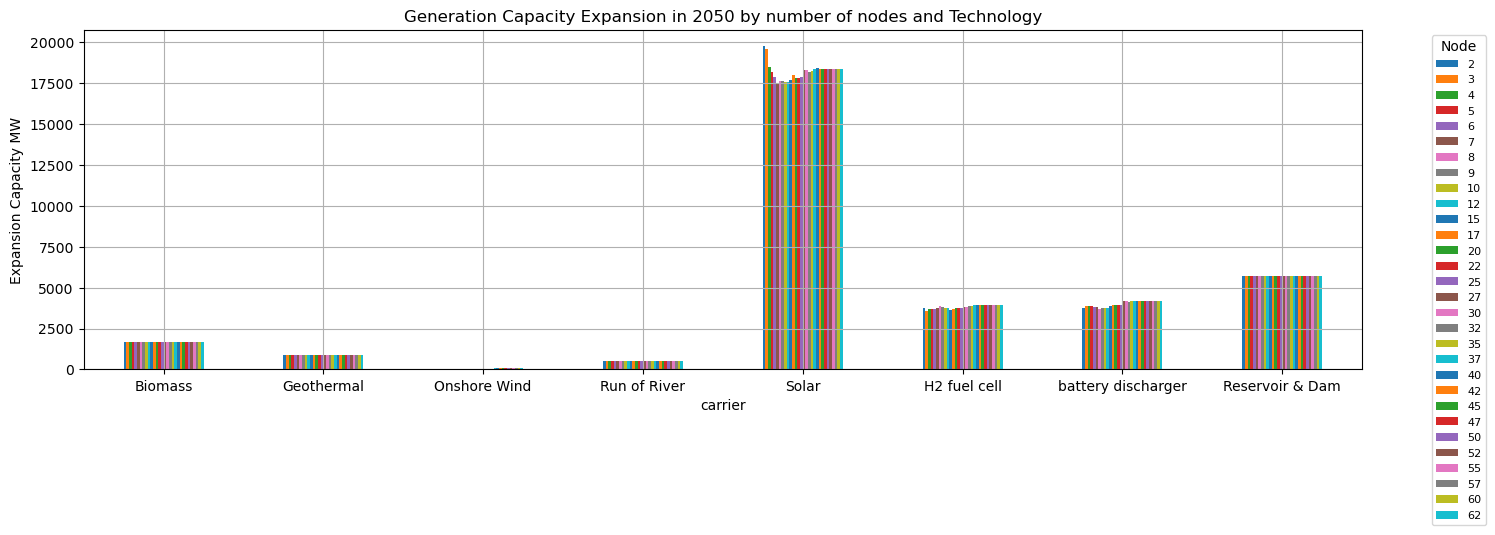

In [25]:
expanded_capacity_4plot_reset.plot(kind='bar', figsize=(15, 5))
plt.title('Generation Capacity Expansion in 2050 by number of nodes and Technology')
#plt.xlabel('Technology')
plt.ylabel('Expansion Capacity MW')
plt.xticks(rotation=0)
plt.legend(title='Node', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

# Energy production analysis

In [26]:
def compile_production (node_list):
    energy_produced = pd.DataFrame()
    energy_produced_generators = pd.DataFrame()
    energy_produced_storageunits = pd.DataFrame()
    for nodes in node_list:
        n = load_networks(nodes)
        energy_produced_generators[nodes] = n.generators_t.p.loc["2013-01-01":"2014-01-01"].groupby(n.generators.carrier, axis=1).sum().sum()
        energy_produced_storageunits[nodes] = n.storage_units_t.p.loc["2013-01-01":"2014-01-01"].groupby(n.storage_units.carrier, axis=1).sum().sum()
        energy_produced[nodes] = pd.concat([energy_produced_generators[nodes], energy_produced_storageunits[nodes]]) 
    return energy_produced

In [27]:
produced_energy = compile_production(node_list)
produced_energy

INFO:pypsa.io:Imported network elec_s_2_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_3_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_7_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_8_ec_lcopt_Co2L-1H.nc has 

,2,3,4,5,6,7,8,9,10,12,15,17,20,22,25,27,30,32,35,37,40,42,45,47,50,52,55,57,60,62
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCGT,1.058952e+06,1.082608e+06,1.082556e+06,1.082639e+06,1.082366e+06,1.082264e+06,1.081801e+06,1.082028e+06,1.082551e+06,1.082331e+06,1.082517e+06,1.082376e+06,1.082217e+06,1.082318e+06,1.082296e+06,1.082430e+06,1.082368e+06,1.082397e+06,1.082442e+06,1.082415e+06,1.082413e+06,1.082479e+06,1.082500e+06,1.082502e+06,1.082527e+06,1.082504e+06,1.082490e+06,1.082511e+06,1.082531e+06,1.082515e+06
OCGT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
biomass,1.545595e+07,1.548311e+07,1.560346e+07,1.559902e+07,1.561319e+07,1.561213e+07,1.554314e+07,1.558725e+07,1.557847e+07,1.557969e+07,1.557735e+07,1.558948e+07,1.556814e+07,1.556593e+07,1.559577e+07,1.562427e+07,1.562490e+07,1.561177e+07,1.561236e+07,1.560867e+07,1.561648e+07,1.560132e+07,1.559942e+07,1.559931e+07,1.560004e+07,1.559552e+07,1.559972e+07,1.559911e+07,1.560006e+07,1.560407e+07
geothermal,8.186235e+06,8.181199e+06,8.184988e+06,8.178350e+06,8.180062e+06,8.171663e+06,8.176993e+06,8.172313e+06,8.181196e+06,8.175983e+06,8.176149e+06,8.172452e+06,8.170953e+06,8.179488e+06,8.171969e+06,8.177197e+06,8.175199e+06,8.178665e+06,8.177937e+06,8.178752e+06,8.179234e+06,8.178380e+06,8.179309e+06,8.179563e+06,8.180244e+06,8.179046e+06,8.181797e+06,8.183142e+06,8.183093e+06,8.181132e+06
load,1.383694e+07,1.227397e+07,1.020879e+07,1.118777e+07,1.169784e+07,1.184742e+07,1.082185e+07,1.074669e+07,1.235555e+07,1.246026e+07,1.144754e+07,1.857749e+07,1.843880e+07,1.844376e+07,1.869030e+07,2.260854e+07,2.268924e+07,2.263491e+07,2.319996e+07,2.759778e+07,2.767828e+07,2.750227e+07,2.749455e+07,2.747182e+07,2.747788e+07,2.758024e+07,2.769749e+07,2.766072e+07,2.759477e+07,2.758773e+07
oil,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
onwind,5.276226e+04,5.892477e+04,5.932223e+04,5.929629e+04,5.999786e+04,6.028765e+04,6.031195e+04,6.050402e+04,6.003946e+04,4.330995e+04,4.501032e+04,4.452788e+04,4.456558e+04,4.346010e+04,4.488622e+04,4.404738e+04,4.750779e+04,4.514785e+04,5.328975e+04,2.118130e+05,1.841795e+05,2.154253e+05,2.315996e+05,2.277753e+05,2.272534e+05,2.322514e+05,2.243595e+05,2.311679e+05,2.268975e+05,2.282887e+05
ror,4.877098e+06,4.869665e+06,4.870199e+06,4.852219e+06,4.839618e+06,4.838815e+06,4.858052e+06,4.850068e+06,4.864593e+06,4.859977e+06,4.860965e+06,4.858139e+06,4.859504e+06,4.865381e+06,4.861639e+06,4.864701e+06,4.860642e+06,4.865383e+06,4.864224e+06,4.859017e+06,4.861731e+06,4.862292e+06,4.861185e+06,4.862118e+06,4.863223e+06,4.862022e+06,4.864179e+06,4.866336e+06,4.861020e+06,4.860320e+06
solar,3.232442e+07,3.220466e+07,3.218383e+07,3.218437e+07,3.217947e+07,3.226497e+07,3.232110e+07,3.224463e+07,3.223266e+07,3.227141e+07,3.229199e+07,3.250424e+07,3.256892e+07,3.256214e+07,3.258901e+07,3.287090e+07,3.288384e+07,3.291605e+07,3.291312e+07,3.294126e+07,3.296948e+07,3.295283e+07,3.291895e+07,3.292900e+07,3.293824e+07,3.291769e+07,3.292217e+07,3.295651e+07,3.294570e+07,3.294509e+07


In [28]:
#Remove non used technologies
produced_energy_4plot = produced_energy.drop(index=['OCGT','load','oil'])
#change units from MWh to TWh
produced_energy_4plot = produced_energy_4plot/1000000
produced_energy_4plot

,2,3,4,5,6,7,8,9,10,12,15,17,20,22,25,27,30,32,35,37,40,42,45,47,50,52,55,57,60,62
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCGT,1.058952,1.082608,1.082556,1.082639,1.082366,1.082264,1.081801,1.082028,1.082551,1.082331,1.082517,1.082376,1.082217,1.082318,1.082296,1.082430,1.082368,1.082397,1.082442,1.082415,1.082413,1.082479,1.082500,1.082502,1.082527,1.082504,1.082490,1.082511,1.082531,1.082515
biomass,15.455952,15.483110,15.603457,15.599024,15.613186,15.612128,15.543142,15.587247,15.578471,15.579691,15.577351,15.589483,15.568138,15.565932,15.595775,15.624268,15.624898,15.611767,15.612360,15.608671,15.616477,15.601320,15.599421,15.599309,15.600042,15.595525,15.599717,15.599107,15.600063,15.604066
geothermal,8.186235,8.181199,8.184988,8.178350,8.180062,8.171663,8.176993,8.172313,8.181196,8.175983,8.176149,8.172452,8.170953,8.179488,8.171969,8.177197,8.175199,8.178665,8.177937,8.178752,8.179234,8.178380,8.179309,8.179563,8.180244,8.179046,8.181797,8.183142,8.183093,8.181132
onwind,0.052762,0.058925,0.059322,0.059296,0.059998,0.060288,0.060312,0.060504,0.060039,0.043310,0.045010,0.044528,0.044566,0.043460,0.044886,0.044047,0.047508,0.045148,0.053290,0.211813,0.184180,0.215425,0.231600,0.227775,0.227253,0.232251,0.224359,0.231168,0.226897,0.228289
ror,4.877098,4.869665,4.870199,4.852219,4.839618,4.838815,4.858052,4.850068,4.864593,4.859977,4.860965,4.858139,4.859504,4.865381,4.861639,4.864701,4.860642,4.865383,4.864224,4.859017,4.861731,4.862292,4.861185,4.862118,4.863223,4.862022,4.864179,4.866336,4.861020,4.860320
solar,32.324423,32.204661,32.183835,32.184368,32.179471,32.264974,32.321103,32.244627,32.232657,32.271412,32.291994,32.504240,32.568916,32.562140,32.589007,32.870901,32.883841,32.916055,32.913125,32.941265,32.969483,32.952833,32.918947,32.929000,32.938244,32.917688,32.922174,32.956507,32.945696,32.945087
hydro,35.010006,35.009796,35.009544,35.009874,35.009071,35.008119,35.006828,35.007507,35.009446,35.008752,35.008783,35.008317,35.007951,35.008423,35.007747,35.008695,35.008302,35.008156,35.008683,35.008244,35.008294,35.008686,35.008638,35.008613,35.008569,35.007656,35.007951,35.008976,35.009032,35.008795


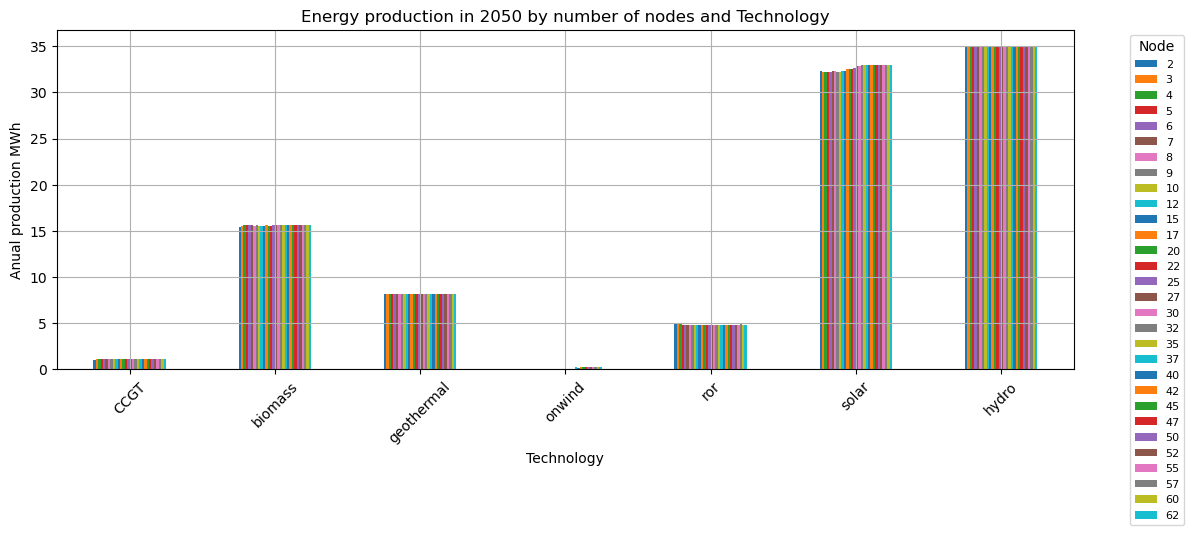

In [29]:
produced_energy_4plot.plot(kind='bar', figsize=(12, 5))
plt.title('Energy production in 2050 by number of nodes and Technology')
plt.xlabel('Technology')
plt.ylabel('Anual production MWh')
plt.xticks(rotation=45)
plt.legend(title='Node', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

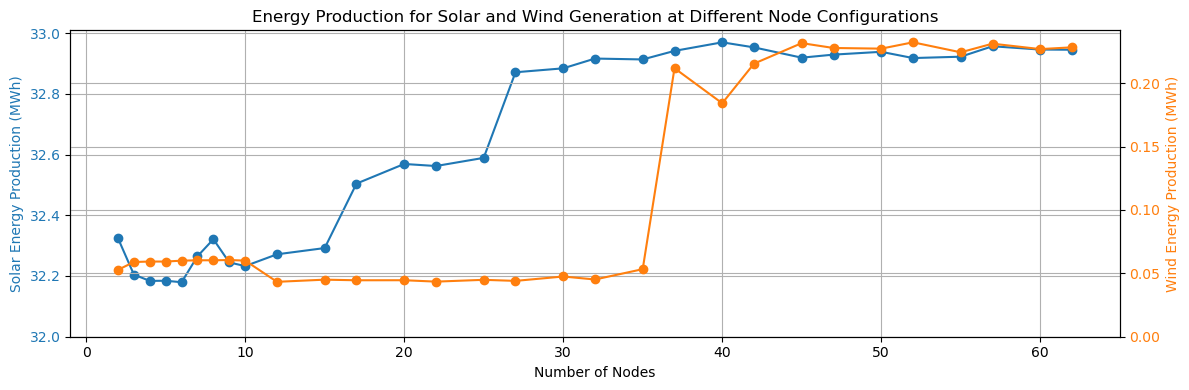

In [30]:
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot solar energy on the primary y-axis
solar_energy_4plot = produced_energy_4plot.T
solar_energy_4plot['solar'].plot(ax=ax1, marker='o', linestyle='-', color='tab:blue')
ax1.set_title('Energy Production for Solar and Wind Generation at Different Node Configurations')
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Solar Energy Production (MWh)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Create a secondary y-axis for wind energy
ax2 = ax1.twinx()
wind_energy_4plot = produced_energy_4plot.T
wind_energy_4plot['onwind'].plot(ax=ax2, marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Wind Energy Production (MWh)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.grid(True)

# Adjust y-axis limits if needed
ax1.set_ylim([32, None])
ax2.set_ylim([0, None])

plt.tight_layout()
plt.show()



# Transmission expantion analysis

In [31]:
def compile_line_expansion (node_list):
    line_expansion = pd.DataFrame()
    for nodes in node_list:
        n = load_networks(nodes)
        for line_name in n.lines.index:  # Iterate over all line names in the network
            line_expansion.loc[line_name, nodes] = n.lines.loc[line_name, 's_nom_opt'] - n.lines.loc[line_name, 's_nom']
        line_expansion[nodes] = n.lines['s_nom_opt'] - n.lines['s_nom']
    
    #filter that considers only positive expansion of the networkd
    line_expansion = line_expansion.applymap(lambda x: x if x > 0 else 0)
    return line_expansion

In [32]:
def compile_line_size (node_list):
    line_size = pd.DataFrame()
    for nodes in node_list:
        n = load_networks(nodes)
        for line_name in n.lines.index:  # Iterate over all line names in the network
            if n.lines.loc[line_name, 's_nom_opt'] >= n.lines.loc[line_name, 's_nom']:
                line_size.loc[line_name, nodes] = n.lines.loc[line_name, 's_nom_opt'] 
            else:
                line_size.loc[line_name, nodes] = n.lines.loc[line_name, 's_nom']
    return line_size

In [33]:
expanded_transmission = compile_line_expansion(node_list)
expanded_transmission

INFO:pypsa.io:Imported network elec_s_2_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_3_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_7_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_8_ec_lcopt_Co2L-1H.nc has 

,2,3,4,5,6,7,8,9,10,12,15,17,20,22,25,27,30,32,35,37,40,42,45,47,50,52,55,57,60,62
1,0,0,754.76106,0.000000,761.685886,0.000000,497.115148,436.578255,410.957294,406.289889,0.000000,0.000000,0.000000,429.218039,0.000000,0.000000,0.000000,0.000000,298.278363,282.659180,521.313698,0.000000,364.015046,223.574377,180.149697,117.591170,802.539578,235.979211,0.000000,111.037019
2,0,0,0.00000,0.000000,0.000000,762.264053,0.000000,402.840602,0.000000,0.000000,399.569044,0.000000,0.000000,0.000000,0.000000,364.962909,1046.398627,1045.437952,0.000000,32.092685,563.095170,0.000000,0.000000,112.969661,98.093042,229.054039,0.000000,103.277575,0.000000,212.195270
3,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,446.247848,0.000000,127.577599,0.000000,0.000000,0.000000,0.000000,0.000000,292.579097,0.000000,0.000000,88.537670,0.000000,113.396544,1306.377766,222.837160,0.000000,0.000000,478.005455,0.000000,477.637976
4,0,0,0.00000,841.643196,0.000000,0.000000,0.000000,0.000000,421.412250,0.000000,0.000000,284.828163,424.845206,0.000000,303.624542,0.000000,0.000000,0.000000,1061.847165,1361.715174,201.950055,7.301401,223.886941,0.000000,112.126373,0.000000,0.000000,615.089031,0.000000,614.830306
5,0,0,0.00000,0.000000,1046.394042,0.000000,133.417725,0.000000,0.000000,532.922081,0.000000,0.000000,0.000000,191.583698,0.000000,0.000000,78.458340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.019784,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
79,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
81,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
average_line = compile_line_size(node_list)
average_line

INFO:pypsa.io:Imported network elec_s_2_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_3_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_7_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_8_ec_lcopt_Co2L-1H.nc has 

,2,3,4,5,6,7,8,9,10,12,15,17,20,22,25,27,30,32,35,37,40,42,45,47,50,52,55,57,60,62
1,3932.448154,1966.224077,2720.985137,1966.224077,1744.797924,983.112038,2463.339225,2402.802332,2377.181370,2372.513965,983.112038,4915.560192,2949.336115,2395.442115,1966.224077,983.112038,983.112038,983.112038,2264.502439,1265.771218,1504.425736,983.112038,1347.127084,1206.686416,1163.261736,1100.703208,1785.651616,1219.091250,983.112038,1094.149057
2,NaN,1966.224077,1966.224077,2949.336115,983.112038,1745.376091,1966.224077,2369.064679,983.112038,5898.672230,2365.793121,2949.336115,3932.448154,3932.448154,983.112038,1348.074947,2029.510666,2028.549991,1966.224077,1015.204723,1546.207208,983.112038,983.112038,1096.081700,1081.205080,1212.166077,983.112038,1086.389614,1966.224077,1195.307309
3,NaN,NaN,3932.448154,1966.224077,1966.224077,1966.224077,2949.336115,2949.336115,983.112038,2412.471924,983.112038,1110.689637,983.112038,2949.336115,983.112038,2949.336115,2949.336115,2258.803174,1966.224077,983.112038,1071.649709,3932.448154,1096.508582,2289.489804,1205.949198,983.112038,3932.448154,1461.117494,983.112038,1460.750014
4,NaN,NaN,NaN,2807.867272,2949.336115,2949.336115,983.112038,1966.224077,2387.636327,1966.224077,4915.560192,2251.052240,2391.069283,983.112038,2269.848619,983.112038,983.112038,983.112038,2044.959203,2344.827212,1185.062093,990.413439,1206.998980,983.112038,1095.238411,983.112038,983.112038,1598.201070,6881.784269,1597.942345
5,NaN,NaN,NaN,NaN,3995.730158,1966.224077,3082.753840,2949.336115,983.112038,1516.034120,2949.336115,983.112038,983.112038,1174.695736,983.112038,983.112038,1061.570379,1966.224077,983.112038,1966.224077,983.112038,983.112038,1966.224077,983.112038,983.112038,1966.224077,1966.224077,983.112038,1100.131823,983.112038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3932.448154,983.112038
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,983.112038,983.112038
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,983.112038
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,983.112038


In [35]:
expaned_transmission_4plot = expanded_transmission.sum()
expaned_transmission_4plot

2        0.000000
3        0.000000
4      754.761060
5      841.643196
6     1808.079929
7     1831.149305
8      630.532874
9      839.418857
10    2575.096374
12    2454.582825
15    1051.219665
17     907.366393
20    1498.647263
22    1826.701373
25    2380.773476
27    1846.353551
30    2651.765452
32    2597.571058
35    2749.132315
37    2825.184663
40    2953.218424
42    4493.734903
45    4768.323318
47    4779.282325
50    4969.416865
52    5032.079979
55    5405.136373
57    5441.705112
60    5413.533587
62    5391.397072
dtype: float64

In [36]:
average_line_4plot = average_line.mean()
average_line_4plot

2     3932.448154
3     1966.224077
4     2873.219122
5     2422.412885
6     1943.632056
7     1949.339730
8     1817.813943
9     1853.543555
10    1771.185425
12    1933.240524
15    1920.473856
17    1868.987423
20    1694.025518
22    1622.408798
25    1610.511731
27    1545.513802
30    1466.837251
32    1489.700129
35    1418.115209
37    1395.444867
40    1330.168882
42    1339.416029
45    1377.223267
47    1335.442972
50    1311.632061
52    1302.891224
55    1303.961386
57    1383.372119
60    1350.304728
62    1324.611721
dtype: float64

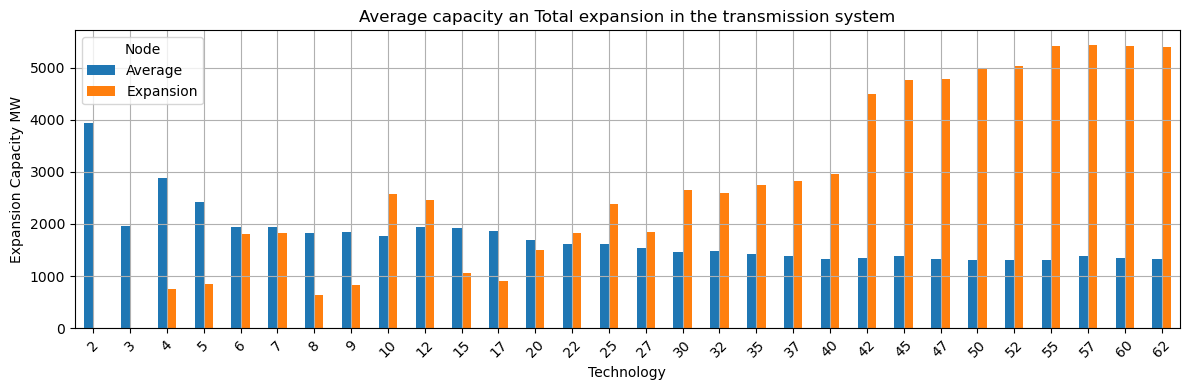

In [37]:
expand_and_average = pd.DataFrame()
expand_and_average['Average'] = average_line_4plot
expand_and_average['Expansion'] = expaned_transmission_4plot

expand_and_average.plot(kind='bar', figsize=(12, 4))

plt.title('Average capacity an Total expansion in the transmission system')
plt.xlabel('Technology')
plt.ylabel('Expansion Capacity MW')
plt.xticks(rotation=45)
plt.legend(title='Node')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
(expanded_transmission > 0).sum()

2      0
3      0
4      1
5      1
6      2
7      2
8      2
9      2
10     4
12     5
15     5
17     5
20     7
22     8
25     9
27     8
30    10
32     9
35    10
37    10
40    14
42    17
45    14
47    14
50    14
52    14
55    16
57    16
60    16
62    16
dtype: int64

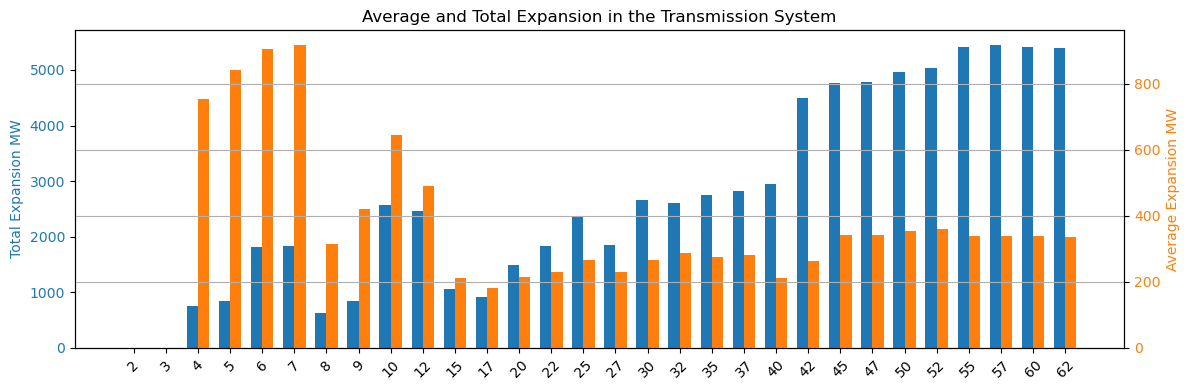

In [39]:
import numpy as np

expand_and_average2 = pd.DataFrame()
expand_and_average2['Average expansion'] = expanded_transmission.sum() / (expanded_transmission > 0).sum()
expand_and_average2['Total expansion'] = expanded_transmission.sum()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 4))

# Define the width of each bar
bar_width = 0.35

# Define the x-coordinates for the bars
x = np.arange(len(expand_and_average2.index))

# Plot 'Total expansion' on the primary y-axis (left)
color1 = 'tab:blue'
ax1.bar(x - bar_width/2, expand_and_average2['Total expansion'], color=color1, width=bar_width)
ax1.set_ylabel('Total Expansion MW', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a secondary y-axis for 'Average expansion' (right)
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.bar(x + bar_width/2, expand_and_average2['Average expansion'], color=color2, width=bar_width)
ax2.set_ylabel('Average Expansion MW', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Set x-axis labels and ticks
ax1.set_xticks(x)
ax1.set_xticklabels(expand_and_average2.index, rotation=45)
plt.xlabel('Technology')

plt.title('Average and Total Expansion in the Transmission System')
plt.grid(True)
plt.tight_layout()
plt.show()

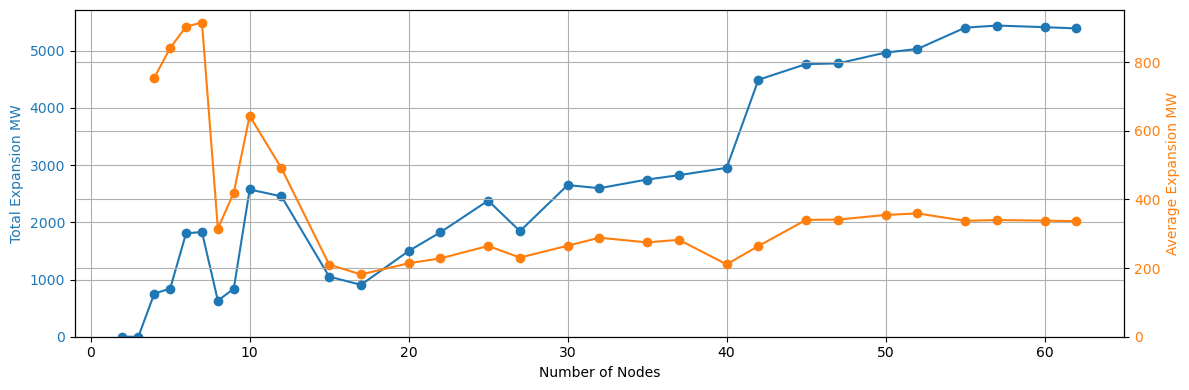

In [40]:
expand_and_average2 = pd.DataFrame()
expand_and_average2['Average expansion'] = expanded_transmission.sum() / (expanded_transmission > 0).sum()
expand_and_average2['Total expansion'] = expanded_transmission.sum()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot 'Total expansion' on the primary y-axis (left)
color1 = 'tab:blue'
expand_and_average2['Total expansion'].plot(ax=ax1, marker='o', linestyle='-', color=color1)
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Total Expansion MW', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)

# Create a secondary y-axis for 'Average expansion' (right)
ax2 = ax1.twinx()
color2 = 'tab:orange'
expand_and_average2['Average expansion'].plot(ax=ax2, marker='o', linestyle='-', color=color2)
ax2.set_ylabel('Average Expansion MW', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(True)

# Adjust y-axis limits if needed
ax1.set_ylim([0, None])
ax2.set_ylim([0, None])

plt.tight_layout()
plt.show()

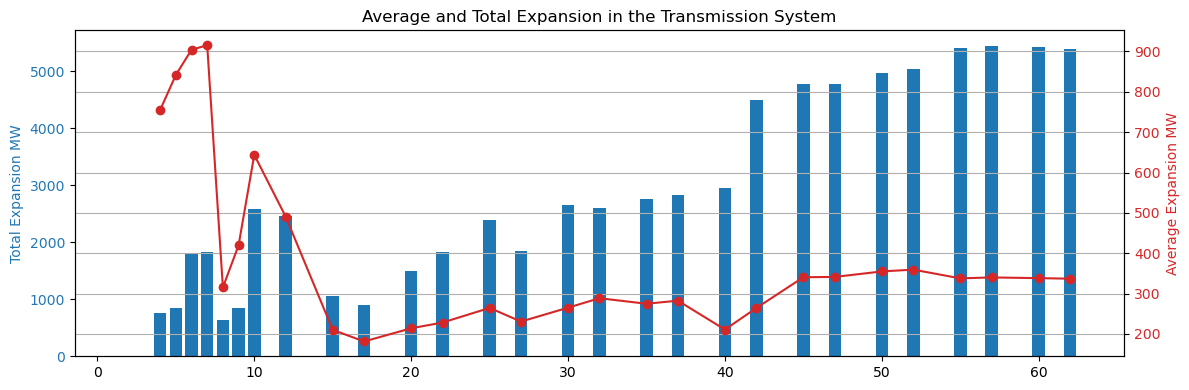

In [41]:
expand_and_average2 = pd.DataFrame()
expand_and_average2['Average expansion'] = expanded_transmission.sum() / (expanded_transmission > 0).sum()
expand_and_average2['Total expansion'] = expanded_transmission.sum()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot 'Total expansion' on the primary y-axis (left)
color = 'tab:blue'
ax1.bar(expand_and_average2.index, expand_and_average2['Total expansion'], color=color)
ax1.set_ylabel('Total Expansion MW', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for 'Average expansion' (right)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(expand_and_average2.index, expand_and_average2['Average expansion'], color=color, marker='o')
ax2.set_ylabel('Average Expansion MW', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average and Total Expansion in the Transmission System')
plt.xlabel('Technology')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Computational resources

In [42]:
# Step 1: Read the data from the Excel file
optimization_data = pd.read_excel(r'C:\Users\Lenovo\Documents\2024\Articulos y publicaciones\ECOS 2024 Part B\Figures\Optimization times\Optimization times by node.xlsx')

# Step 2: Sort the data by optimization time
sorted_data = optimization_data.sort_values(by='Optimization Time [seconds]', ascending=False)

# Step 3: Calculate cumulative percentage of optimization time
sorted_data['Cumulative Percentage'] = (sorted_data['Optimization Time [seconds]'].cumsum() / sorted_data['Optimization Time [seconds]'].sum()) * 100
sorted_data

,Nodes,Optimization Time [seconds],Cumulative Percentage
38,57,3246.24,7.891371
40,62,3120.90,15.478049
39,60,2950.47,22.650425
36,52,2726.63,29.278661
33,45,2470.54,35.284362
35,50,2424.77,41.178800
37,55,2405.81,47.027147
34,47,2345.50,52.728885
32,42,1868.45,57.270950
31,40,1598.62,61.157077


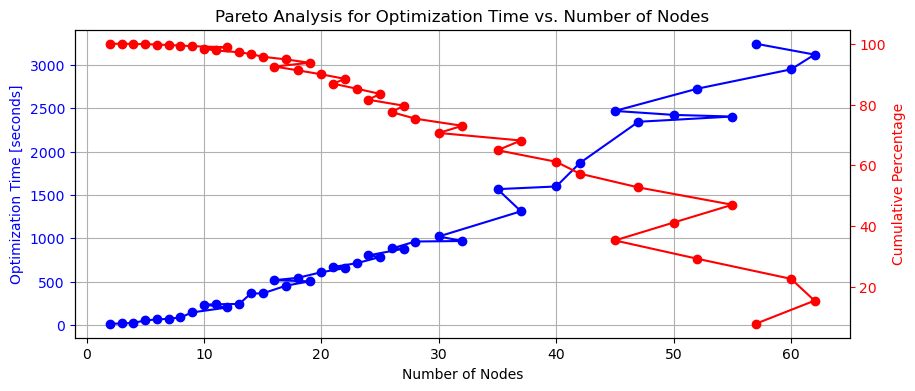

In [43]:
# Step 4: Plot the Pareto chart for time used
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot optimization time on the primary y-axis (left)
ax1.plot(sorted_data['Nodes'], sorted_data['Optimization Time [seconds]'], color='b', marker='o')
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Optimization Time [seconds]', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True)

# Create a secondary y-axis for cumulative percentage (right)
ax2 = ax1.twinx()
ax2.plot(sorted_data['Nodes'], sorted_data['Cumulative Percentage'], color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Analysis for Optimization Time vs. Number of Nodes')
plt.show()

# Expansion differences (solar)

In [44]:
expanded_capacity_solar = pd.DataFrame()
expanded_capacity_solar['Capacity'] = expanded_capacity.loc['Generator','Solar']
expanded_capacity_solar['Nodes'] = expanded_capacity_solar.index
expanded_capacity_solar.reset_index(drop=True, inplace=True)
expanded_capacity_solar


,Capacity,Nodes
0,19761.059883,2
1,19581.939676,3
2,18488.709124,4
3,18194.711331,5
4,17849.014424,6
5,17530.002472,7
6,17646.533186,8
7,17634.480658,9
8,17544.690289,10
9,17570.302255,12


In [45]:
reference_value = expanded_capacity_solar.loc[expanded_capacity_solar['Nodes'] == 62, 'Capacity'].values[0]
solar_sorted_data = expanded_capacity_solar
solar_sorted_data['Capacity divergence'] = abs(reference_value - expanded_capacity_solar['Capacity'])
#solar_sorted_data = expanded_capacity_solar.sort_values(by='Capacity divergence', ascending=False)
solar_sorted_data['Cumulative Percentage'] = (solar_sorted_data['Capacity divergence'].cumsum() / solar_sorted_data['Capacity divergence'].sum()) * 100
solar_sorted_data.reset_index(drop=True, inplace=True)
solar_sorted_data

,Capacity,Nodes,Capacity divergence,Cumulative Percentage
0,19761.059883,2,1396.396041,13.264480
1,19581.939676,3,1217.275834,24.827482
2,18488.709124,4,124.045282,26.005798
3,18194.711331,5,169.952511,27.620191
4,17849.014424,6,515.649418,32.518387
5,17530.002472,7,834.661370,40.446903
6,17646.533186,8,718.130656,47.268485
7,17634.480658,9,730.183184,54.204554
8,17544.690289,10,819.973553,61.993550
9,17570.302255,12,794.361587,69.539255


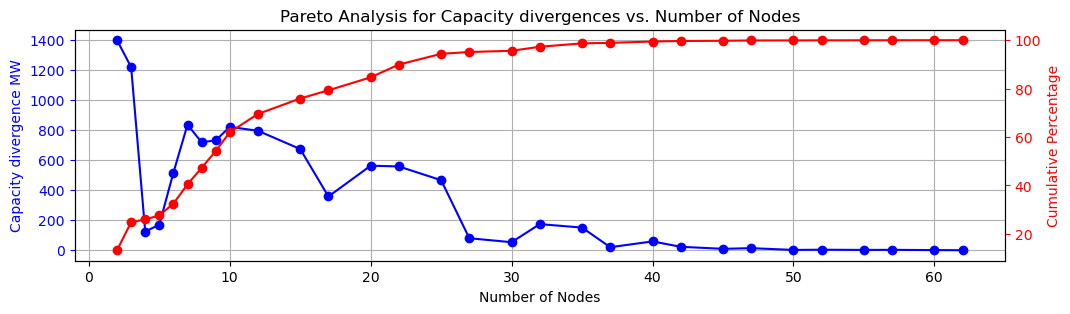

In [46]:
# Step 4: Plot the Pareto chart for time used
fig, ax1 = plt.subplots(figsize=(12, 3))

# Plot optimization time on the primary y-axis (left)
ax1.plot(solar_sorted_data['Nodes'], solar_sorted_data['Capacity divergence'], color='b', marker='o')
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Capacity divergence MW', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True)

# Create a secondary y-axis for cumulative percentage (right)
ax2 = ax1.twinx()
ax2.plot(solar_sorted_data['Nodes'], solar_sorted_data['Cumulative Percentage'], color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Analysis for Capacity divergences vs. Number of Nodes')
plt.show()

# Production diferences (solar)

In [47]:
generation_solar = pd.DataFrame()
generation_solar['Production [MWh]'] = produced_energy.loc['solar']
generation_solar['Nodes'] = generation_solar.index
generation_solar

,Production [MWh],Nodes
2,3.232442e+07,2
3,3.220466e+07,3
4,3.218383e+07,4
5,3.218437e+07,5
6,3.217947e+07,6
7,3.226497e+07,7
8,3.232110e+07,8
9,3.224463e+07,9
10,3.223266e+07,10
12,3.227141e+07,12


In [48]:
reference_value = generation_solar.loc[62, 'Production [MWh]'] 
sorted_generation_solar = generation_solar
sorted_generation_solar['Production divergence'] = abs(reference_value - generation_solar['Production [MWh]'])
#sorted_generation_solar = sorted_generation_solar.sort_values(by='Production divergence', ascending=False)
sorted_generation_solar['Cumulative Percentage'] = (sorted_generation_solar['Production divergence'].cumsum() / sorted_generation_solar['Production divergence'].sum()) * 100
sorted_generation_solar.reset_index(drop=True, inplace=True)
sorted_generation_solar

,Production [MWh],Nodes,Production divergence,Cumulative Percentage
0,3.232442e+07,2,620663.475477,6.470455
1,3.220466e+07,3,740425.338479,14.189436
2,3.218383e+07,4,761251.685286,22.125532
3,3.218437e+07,5,760718.968977,30.056075
4,3.217947e+07,6,765615.170061,38.037661
5,3.226497e+07,7,680112.553565,45.127877
6,3.232110e+07,8,623983.174450,51.632940
7,3.224463e+07,9,700459.688954,58.935276
8,3.223266e+07,10,712430.048120,66.362404
9,3.227141e+07,12,673674.768854,73.385505


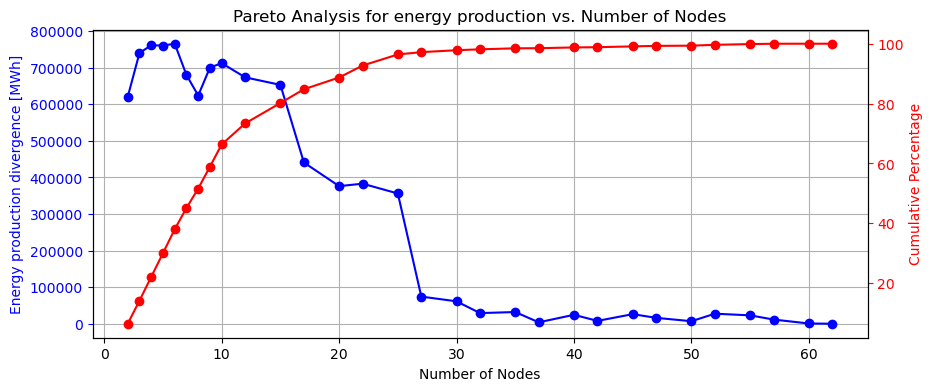

In [49]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(sorted_generation_solar['Nodes'], sorted_generation_solar['Production divergence'], color='b', marker='o')
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Energy production divergence [MWh]', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True)

# Create a secondary y-axis for cumulative percentage (right)
ax2 = ax1.twinx()
ax2.plot(sorted_generation_solar['Nodes'], sorted_generation_solar['Cumulative Percentage'], color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Analysis for energy production vs. Number of Nodes')
plt.show()

# Expansion differences (wind)

In [50]:
expanded_capacity_wind = pd.DataFrame()
expanded_capacity_wind['Capacity'] = expanded_capacity.loc['Generator','Onshore Wind']
expanded_capacity_wind['Nodes'] = expanded_capacity_wind.index
expanded_capacity_wind.reset_index(drop=True, inplace=True)
expanded_capacity_wind

,Capacity,Nodes
0,0.071864,2
1,0.195832,3
2,0.359870,4
3,0.230986,5
4,0.900126,6
5,2.747266,7
6,2.560645,8
7,2.240299,9
8,0.555410,10
9,1.888617,12


In [51]:
reference_value = expanded_capacity_wind.loc[expanded_capacity_wind['Nodes'] == 62, 'Capacity'].values[0]
solar_sorted_data2 = expanded_capacity_wind
solar_sorted_data2['Capacity divergence'] = abs(reference_value - expanded_capacity_wind['Capacity'])
#solar_sorted_data2 = expanded_capacity_wind.sort_values(by='Capacity divergence', ascending=False)
solar_sorted_data2['Cumulative Percentage'] = (solar_sorted_data['Capacity divergence'].cumsum() / solar_sorted_data['Capacity divergence'].sum()) * 100
solar_sorted_data2.reset_index(drop=True, inplace=True)
solar_sorted_data2

,Capacity,Nodes,Capacity divergence,Cumulative Percentage
0,0.071864,2,76.375291,13.264480
1,0.195832,3,76.251323,24.827482
2,0.359870,4,76.087285,26.005798
3,0.230986,5,76.216169,27.620191
4,0.900126,6,75.547029,32.518387
5,2.747266,7,73.699889,40.446903
6,2.560645,8,73.886510,47.268485
7,2.240299,9,74.206856,54.204554
8,0.555410,10,75.891746,61.993550
9,1.888617,12,74.558538,69.539255


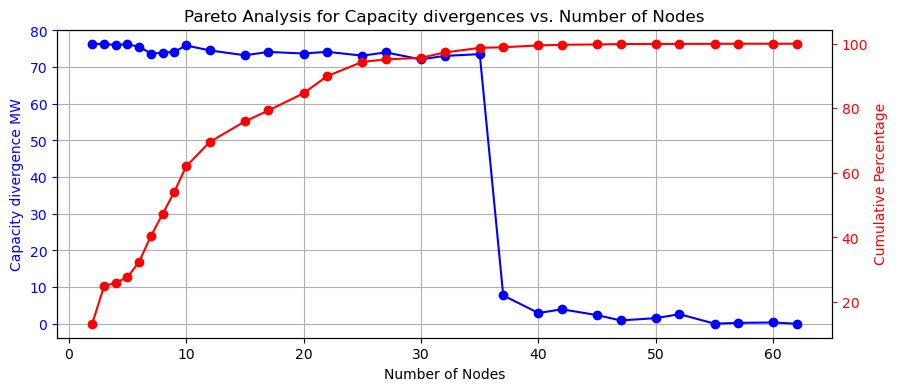

In [52]:
# Step 4: Plot the Pareto chart for time used
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot optimization time on the primary y-axis (left)
ax1.plot(solar_sorted_data2['Nodes'], solar_sorted_data2['Capacity divergence'], color='b', marker='o')
ax1.set_xlabel('Number of Nodes')
ax1.set_ylabel('Capacity divergence MW', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True)

# Create a secondary y-axis for cumulative percentage (right)
ax2 = ax1.twinx()
ax2.plot(solar_sorted_data2['Nodes'], solar_sorted_data2['Cumulative Percentage'], color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Analysis for Capacity divergences vs. Number of Nodes')
plt.show()

# Cost analysis

In [53]:
def compile_costs (node_list):
    CAPEX = pd.DataFrame()
    OPEX = pd.DataFrame()
    for nodes in node_list:
        n = load_networks(nodes)
        CAPEX[nodes] = n.statistics()['Capital Expenditure']
        OPEX[nodes] = n.statistics()['Operational Expenditure']
    return CAPEX, OPEX

In [54]:
CAPEX, OPEX = compile_costs(node_list)

INFO:pypsa.io:Imported network elec_s_2_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_3_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_7_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_8_ec_lcopt_Co2L-1H.nc has 

In [55]:
#removing non generation components
CAPEX_4plot = CAPEX.drop(index=['Line','Load','Store'], level=0)
CAPEX_4plot = CAPEX_4plot.drop(index=['Oil','Combined-Cycle Gas','Open-Cycle Gas','load'], level=1)
#Reset the index to flatten the MultiIndex
CAPEX_4plot = CAPEX_4plot.reset_index(level=0, drop=True)
CAPEX_4plot

,2,3,4,5,6,7,8,9,10,12,15,17,20,22,25,27,30,32,35,37,40,42,45,47,50,52,55,57,60,62
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Biomass,3.522247e+08,3.522249e+08,3.522249e+08,3.522249e+08,3.522249e+08,3.522245e+08,3.522249e+08,3.522248e+08,3.522249e+08,3.522249e+08,3.522249e+08,3.522249e+08,3.522249e+08,3.522249e+08,3.522242e+08,3.522246e+08,3.522248e+08,3.522246e+08,3.522248e+08,3.522248e+08,3.522249e+08,3.521279e+08,3.522245e+08,3.522220e+08,3.522207e+08,3.522243e+08,3.522098e+08,3.522223e+08,3.522225e+08,3.522213e+08
Geothermal,2.768408e+08,2.768410e+08,2.768411e+08,2.768411e+08,2.768412e+08,2.768411e+08,2.768411e+08,2.768409e+08,2.768412e+08,2.768411e+08,2.768411e+08,2.768411e+08,2.768410e+08,2.768412e+08,2.768404e+08,2.768412e+08,2.768405e+08,2.768406e+08,2.768396e+08,2.768405e+08,2.768408e+08,2.768403e+08,2.768410e+08,2.768411e+08,2.768406e+08,2.768407e+08,2.768398e+08,2.768335e+08,2.768337e+08,2.768409e+08
Onshore Wind,5.835125e+06,5.851175e+06,5.872411e+06,5.855726e+06,5.942354e+06,6.181490e+06,6.157330e+06,6.115857e+06,5.897726e+06,6.070327e+06,6.243970e+06,6.124143e+06,6.181213e+06,6.121109e+06,6.256379e+06,6.141357e+06,6.389694e+06,6.264899e+06,6.203477e+06,1.672100e+07,1.534464e+07,1.521321e+07,1.602604e+07,1.583910e+07,1.592028e+07,1.605940e+07,1.572053e+07,1.575359e+07,1.567930e+07,1.572288e+07
Run of River,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08,1.560406e+08
Solar,1.010074e+09,1.000964e+09,9.453670e+08,9.304154e+08,9.128347e+08,8.966110e+08,9.025373e+08,9.019244e+08,8.973580e+08,8.986605e+08,9.048461e+08,9.208914e+08,9.104729e+08,9.107340e+08,9.153793e+08,9.350052e+08,9.363481e+08,9.302323e+08,9.314061e+08,9.400722e+08,9.420420e+08,9.402218e+08,9.395281e+08,9.397536e+08,9.389571e+08,9.388891e+08,9.391573e+08,9.391853e+08,9.390113e+08,9.390585e+08
H2 electrolysis,8.143218e+07,8.048244e+07,8.201110e+07,8.079135e+07,8.128369e+07,8.321450e+07,8.861248e+07,8.534334e+07,8.447233e+07,8.538560e+07,8.158392e+07,8.429326e+07,8.529666e+07,8.540001e+07,8.530493e+07,8.674603e+07,8.691089e+07,8.898683e+07,8.872747e+07,9.166478e+07,9.209537e+07,9.170976e+07,9.136179e+07,9.144090e+07,9.125780e+07,9.118810e+07,9.127976e+07,9.135783e+07,9.123790e+07,9.130817e+07
H2 fuel cell,9.198254e+07,8.770020e+07,9.102228e+07,9.036109e+07,9.029936e+07,9.152041e+07,9.485661e+07,9.260729e+07,9.229710e+07,9.213063e+07,8.878022e+07,9.011467e+07,9.143955e+07,9.132904e+07,9.122075e+07,9.383448e+07,9.356261e+07,9.457701e+07,9.414293e+07,9.567293e+07,9.580439e+07,9.608600e+07,9.592336e+07,9.598387e+07,9.582256e+07,9.579270e+07,9.572633e+07,9.579585e+07,9.576581e+07,9.579116e+07
battery charger,1.297902e+08,1.345689e+08,1.339328e+08,1.334206e+08,1.330126e+08,1.319052e+08,1.283964e+08,1.305139e+08,1.294110e+08,1.296448e+08,1.341321e+08,1.371462e+08,1.359011e+08,1.360336e+08,1.374842e+08,1.440155e+08,1.442479e+08,1.431849e+08,1.440573e+08,1.443918e+08,1.442870e+08,1.440815e+08,1.441496e+08,1.440831e+08,1.442386e+08,1.442584e+08,1.443027e+08,1.442417e+08,1.442756e+08,1.442552e+08
battery discharger,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


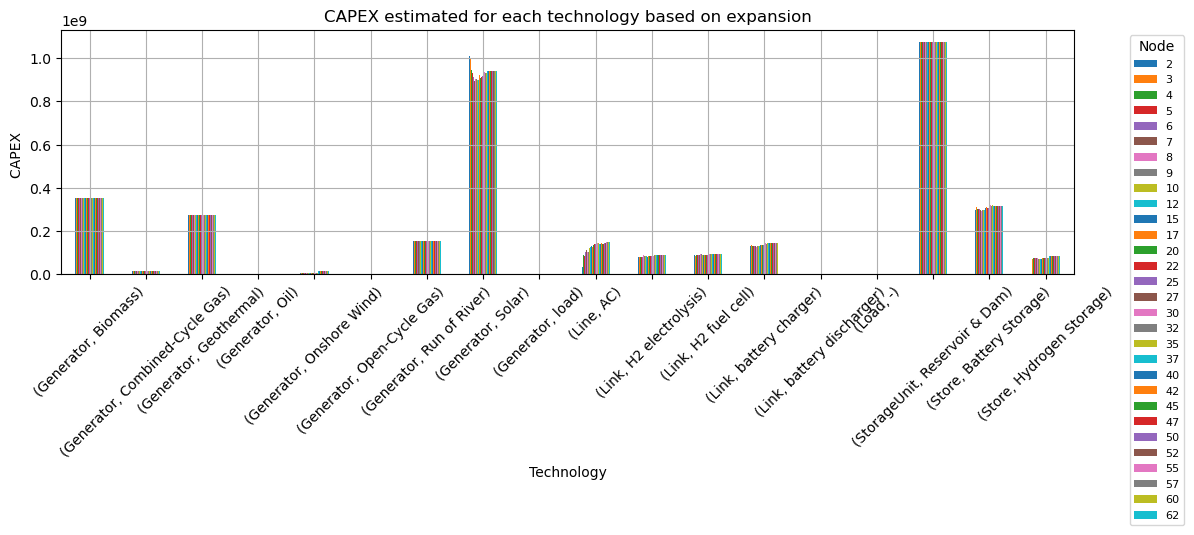

In [56]:
CAPEX.plot(kind='bar', figsize=(12, 5))
plt.title('CAPEX estimated for each technology based on expansion')
plt.xlabel('Technology')
plt.ylabel('CAPEX ')
plt.xticks(rotation=45)
plt.legend(title='Node', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()